In [66]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [67]:
df= pd.read_csv("/content/warn_error.csv")

In [68]:
df1= df.copy()

In [69]:
df1

,static_text,log_level,preprocessed_text
0,No serialized RegionInfo in,warn,serial regioninfo
1,Ignoring invalid region for server | ; cell=,error,ignor invalid region server
2,Failed to parse the passed region name:,warn,fail pars pass region name
3,No serialized RegionInfo in,warn,serial regioninfo
4,Ignoring invalid region for server | ; cell=,error,ignor invalid region server
...,...,...,...
7062,failed to parse [*],error,fail pars
7063,could not update watcher stopped status to [*]...,error,could updat watcher stop statu sourc
7064,caught an interrupted exception when waiting w...,warn,caught interrupt except wait close ticker thread
7065,Unexpected failure,error,unexpect failur


In [70]:
df1['log_level'].value_counts()

warn     3755
error    3312
Name: log_level, dtype: int64

In [71]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
df1['preprocessed_text'].fillna('', inplace=True)
df1 = df1.dropna(subset=['preprocessed_text'])

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df1['preprocessed_text'])

In [75]:
# Label encoding
df1['log_level'] = df1['log_level'].map({'warn': 0, 'error': 1})
y = df['log_level']

In [76]:
df1

,static_text,log_level,preprocessed_text
0,No serialized RegionInfo in,0,serial regioninfo
1,Ignoring invalid region for server | ; cell=,1,ignor invalid region server
2,Failed to parse the passed region name:,0,fail pars pass region name
3,No serialized RegionInfo in,0,serial regioninfo
4,Ignoring invalid region for server | ; cell=,1,ignor invalid region server
...,...,...,...
7062,failed to parse [*],1,fail pars
7063,could not update watcher stopped status to [*]...,1,could updat watcher stop statu sourc
7064,caught an interrupted exception when waiting w...,0,caught interrupt except wait close ticker thread
7065,Unexpected failure,1,unexpect failur


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model: RF**

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model=RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [82]:

y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score, classification_report

In [84]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [85]:
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7362093352192363
              precision    recall  f1-score   support

       error       0.75      0.70      0.72       696
        warn       0.73      0.77      0.75       718

    accuracy                           0.74      1414
   macro avg       0.74      0.74      0.74      1414
weighted avg       0.74      0.74      0.74      1414



done
done
['warn' 'warn' 'warn' 'warn' 'warn' 'warn' 'error' 'warn' 'error']
Accuracy: 0.56
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[5 0]
 [4 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


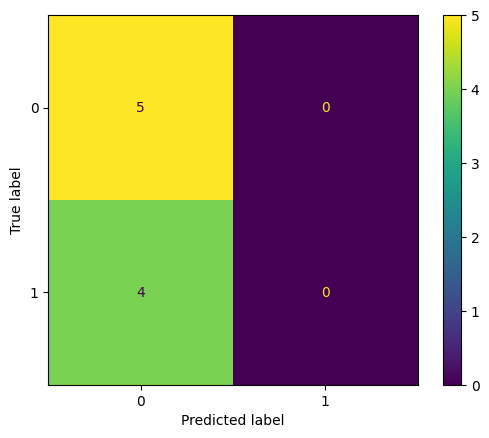

done
done
['warn' 'warn' 'warn' 'warn' 'warn' 'warn' 'error' 'warn' 'error']
Accuracy: 0.56
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[5 0]
 [4 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


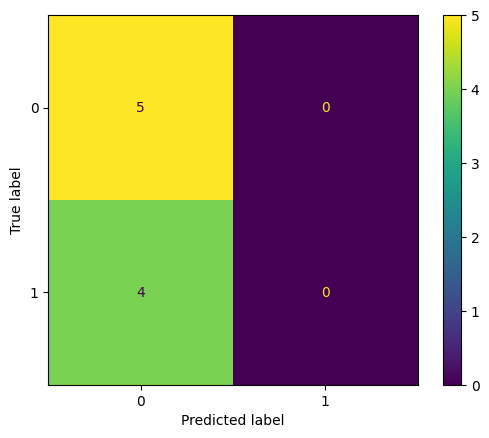

In [86]:
#Using RF


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Referred to https://learn.microsoft.com/en-us/previous-versions/windows/desktop/bb226812(v=vs.85) to construct representative log messages.
messages = ["Out of memory", "File format does not match required format","Division by zero is undefined", "Unused import 'unused_function'", "File not found", "Could not complete operation index out of bounds.", "missing parentheses in call to 'example_function'", "This function is deprecated, use new_function instead", "Timeout system connection could not be established"]
#The codding for the log messages is: {wARN: 1, ERROR:0}.
true_labels = [0,0,1,1,0,0,1,1,0]

#Feature extraction using TF-IDF
message_Vect = tfidf_vectorizer.transform(messages)
print('done')
predicted_labels = model.predict(message_Vect)
predicted_lables_bin = []
for i in predicted_labels:
    if i=='info':
        predicted_lables_bin.append(1)
    else:
        predicted_lables_bin.append(0)

print('done')
#Calculates accuracy
accuracy = accuracy_score(true_labels,predicted_lables_bin)
print(predicted_labels)
#Calculate precision, recall, and F1 score
precision = precision_score(true_labels,predicted_lables_bin)
recall = recall_score(true_labels, predicted_lables_bin)
f1 = f1_score(true_labels, predicted_lables_bin)

#Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_lables_bin)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_lables_bin)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

plt.show()#The codding for the log messages is: {WARN: 1, ERROR:0}.
true_labels = [0,0,1,1,0,0,1,1,0]

#Feature extraction using TF-IDF
message_Vect = tfidf_vectorizer.transform(messages)
print('done')
predicted_labels = model.predict(message_Vect)
predicted_lables_bin = []
for i in predicted_labels:
    if i=='info':
        predicted_lables_bin.append(1)
    else:
        predicted_lables_bin.append(0)

print('done')
#Calculates accuracy
accuracy = accuracy_score(true_labels,predicted_lables_bin)
print(predicted_labels)
#Calculate precision, recall, and F1 score
precision = precision_score(true_labels,predicted_lables_bin)
recall = recall_score(true_labels, predicted_lables_bin)
f1 = f1_score(true_labels, predicted_lables_bin)

#Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_lables_bin)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_lables_bin)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

plt.show()

## **Model: SVM**

In [87]:
from sklearn.svm import SVC

In [88]:
model1=SVC()
model1.fit(X_train, y_train)

SVC()

In [89]:
y_pred = model1.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, classification_report

In [91]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [92]:
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7298444130127298
              precision    recall  f1-score   support

       error       0.76      0.66      0.71       696
        warn       0.71      0.80      0.75       718

    accuracy                           0.73      1414
   macro avg       0.73      0.73      0.73      1414
weighted avg       0.73      0.73      0.73      1414



done
done
['warn' 'warn' 'warn' 'warn' 'warn' 'warn' 'error' 'warn' 'warn']
Accuracy: 0.56
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[5 0]
 [4 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


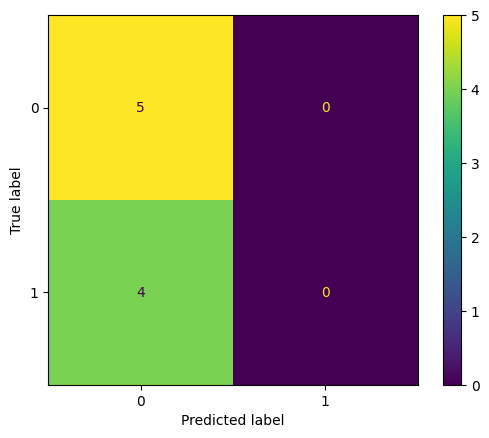

In [93]:
# Using SVM


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Referred to https://learn.microsoft.com/en-us/previous-versions/windows/desktop/bb226812(v=vs.85) to construct representative log messages.
messages = ["Out of memory", "File format does not match required format","Division by zero is undefined", "Unused import 'unused_function'", "File not found", "Could not complete operation index out of bounds.", "missing parentheses in call to 'example_function'", "This function is deprecated, use new_function instead", "Timeout system connection could not be established"]
#The codding for the log messages is: {wARN: 1, ERROR:0}.
true_labels = [0,0,1,1,0,0,1,1,0]

#Feature extraction using TF-IDF
message_Vect = tfidf_vectorizer.transform(messages)
print('done')
predicted_labels = model1.predict(message_Vect)
predicted_lables_bin = []
for i in predicted_labels:
    if i=='info':
        predicted_lables_bin.append(1)
    else:
        predicted_lables_bin.append(0)

print('done')
#Calculates accuracy
accuracy = accuracy_score(true_labels,predicted_lables_bin)
print(predicted_labels)
#Calculate precision, recall, and F1 score
precision = precision_score(true_labels,predicted_lables_bin)
recall = recall_score(true_labels, predicted_lables_bin)
f1 = f1_score(true_labels, predicted_lables_bin)

#Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_lables_bin)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_lables_bin)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

plt.show()